# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import random

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"

# Set Up

In [2]:
slide_input = 12

In [4]:
def gen(input):
    x = []
    y = []
    for i in range(input):
        x.append(i+1)
    slope = random.randint(1,4)
    for i in x:
        val = i*slope
        rand = random.randint(1,3)
        if rand == 1:
            y.append(val+1)
        elif rand == 2:
            y.append(val-1)
        else:
            y.append(val+2)
    print(x, len(x))
    print(y, len(y))
    data = pd.DataFrame({'X': x, 'Y': y})
    return data

In [5]:
data = gen(slide_input)
data

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 12
[2, 4, 5, 5, 4, 8, 8, 9, 11, 11, 10, 11] 12


,X,Y
0,1,2
1,2,4
2,3,5
3,4,5
4,5,4
5,6,8
6,7,8
7,8,9
8,9,11
9,10,11


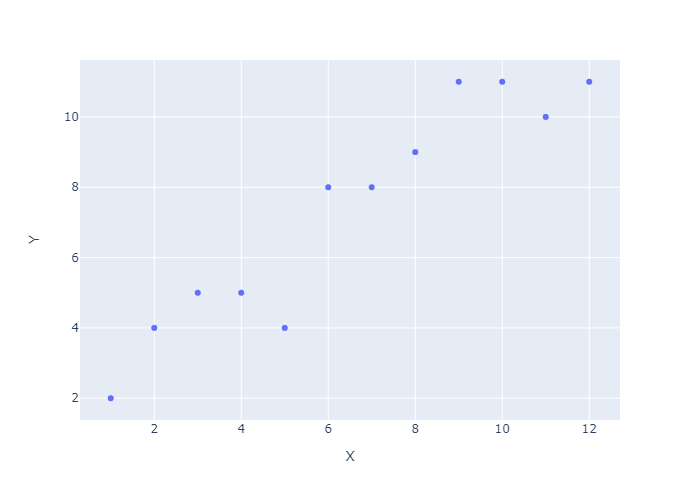

In [6]:
px.scatter(data, x='X', y='Y')

# Regression Simulation

In [7]:
reg = LinearRegression().fit(np.array(data['X']).reshape(-1,1), np.array(data['Y']).reshape(-1,1))

In [12]:
preds = reg.predict(np.array(data['X']).reshape(-1,1))
new_data = pd.DataFrame({'X': np.array(data['X']).reshape(-1), 'Y': np.array(data['Y']).reshape(-1), 'Model': preds.reshape(-1)})
new_data

,X,Y,Model
0,1,2,2.717949
1,2,4,3.557110
2,3,5,4.396270
3,4,5,5.235431
4,5,4,6.074592
5,6,8,6.913753
6,7,8,7.752914
7,8,9,8.592075
8,9,11,9.431235
9,10,11,10.270396


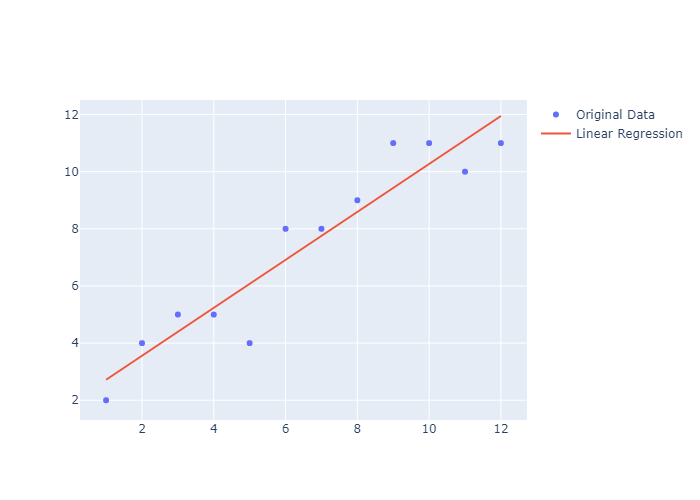

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=new_data['X'], y=new_data['Y'], mode='markers', name='Original Data'))
fig.add_trace(go.Scatter(x=new_data['X'], y=new_data['Model'], mode='lines', name='Linear Regression'))

fig.show()

In [14]:
gen(2)

[1, 2] 2
[3, 4] 2


,X,Y
0,1,3
1,2,4
